In [2]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , MaxAbsScaler , MinMaxScaler 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.decomposition import PCA,NMF

In [3]:
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import fetch_lfw_people

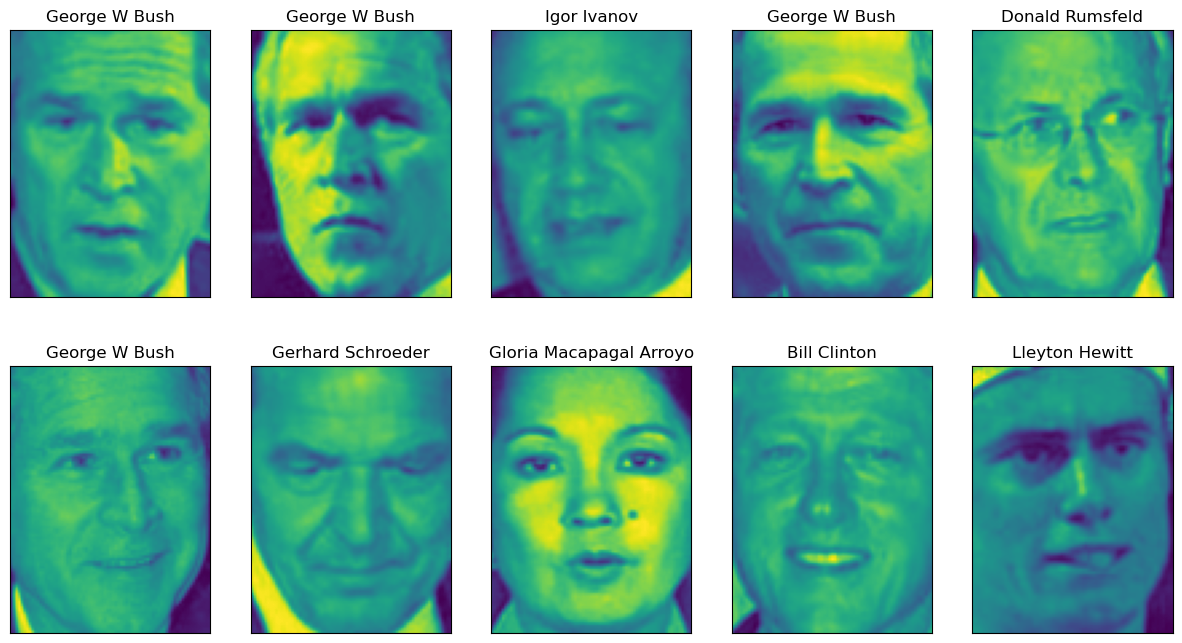

In [7]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.8)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [5]:
counts = np.bincount(people.target)
# печатаем частоты рядом с ответами
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Bill Clinton               29 Donald Rumsfeld           121 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Igor Ivanov                20 
Lleyton Hewitt             41 Tiger Woods                23 Tom Daschle                25 


In [6]:
mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
accuracy_score(knn.predict(X_test),y_test)

0.43373493975903615

In [8]:
pca = PCA(n_components=45, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn.fit(X_train_pca, y_train)
accuracy_score(knn.predict(X_test_pca),y_test)

0.5662650602409639

In [20]:
nmf = NMF(n_components=20, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
knn.fit(X_train_nmf, y_train)
accuracy_score(knn.predict(X_test_nmf),y_test)

0.40963855421686746

In [14]:
people.images[1]

array([[0.04183007, 0.04444445, 0.03660131, ..., 0.18039216, 0.16470589,
        0.16601308],
       [0.03921569, 0.04052288, 0.02222222, ..., 0.20392157, 0.18692811,
        0.18169935],
       [0.0379085 , 0.03529412, 0.01437909, ..., 0.21960784, 0.19215687,
        0.17908497],
       ...,
       [0.04836601, 0.04313726, 0.04052288, ..., 0.76209146, 0.7869281 ,
        0.8235294 ],
       [0.04705882, 0.04313726, 0.04052288, ..., 0.7673202 , 0.77777773,
        0.8130719 ],
       [0.04183007, 0.04052288, 0.03660131, ..., 0.76209146, 0.78169936,
        0.793464  ]], dtype=float32)